In [1]:
import numpy as np
import scipy as sp
import sympy as sy

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.special as spe
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colormaps
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

from sympy import *

In [2]:
gs = GridSpec(nrows=1, ncols=2, width_ratios=[1,1], height_ratios=[1])
cmaps = plt.colormaps()

blues = mpl.colormaps["Blues"].resampled(30)
purples = mpl.colormaps["Purples"].resampled(22)
reds = mpl.colormaps["Reds"].resampled(12)
orange = mpl.colormaps["YlOrBr"].resampled(22)
green = mpl.colormaps["YlGn"].resampled(30)
spectrum = mpl.colormaps["viridis"].resampled(30)

Numerical Integration

In [3]:
def numerical_int(gam,lower_bound,upper_bound,diff,val_1,val_2):
    degree_grid = np.linspace(lower_bound,upper_bound,diff)
    rad_grid = np.linspace(np.deg2rad(lower_bound),np.deg2rad(upper_bound),diff)
    n_int = 0

    mathie_arr = [spe.mathieu_cem(0, gam, degree_grid)[0],spe.mathieu_sem(1, gam, degree_grid)[0],spe.mathieu_cem(1, gam, degree_grid)[0]]
    d_mathie_arr = [spe.mathieu_cem(0, gam, degree_grid)[1],spe.mathieu_sem(1, gam, degree_grid)[1],spe.mathieu_cem(1, gam, degree_grid)[1]]

    condi = (val_1,val_2)

    match condi:
        case (0,0):
            for i in range(diff):
                n_int += mathie_arr[0][i] * d_mathie_arr[0][i] * (rad_grid[1]-rad_grid[0]) 
        case (0,1):
            for i in range(diff):
                n_int += mathie_arr[0][i] * d_mathie_arr[1][i] * (rad_grid[1]-rad_grid[0])
        case (0,2):
            for i in range(diff):
                n_int += mathie_arr[0][i] * d_mathie_arr[2][i] * (rad_grid[1]-rad_grid[0])
        case (1,0):
            for i in range(diff):
                n_int += mathie_arr[1][i] * d_mathie_arr[0][i] * (rad_grid[1]-rad_grid[0])
        case (1,1):
            for i in range(diff):
                n_int += mathie_arr[1][i] * d_mathie_arr[1][i] * (rad_grid[1]-rad_grid[0])
        case (1,2):
            for i in range(diff):
                n_int += mathie_arr[1][i] * d_mathie_arr[2][i] * (rad_grid[1]-rad_grid[0])
        case (2,0):
            for i in range(diff):
                n_int += mathie_arr[2][i] * d_mathie_arr[0][i] * (rad_grid[1]-rad_grid[0])
        case (2,1):
            for i in range(diff):
                n_int += mathie_arr[2][i] * d_mathie_arr[1][i] * (rad_grid[1]-rad_grid[0])
        case (2,2):
            for i in range(diff):
                n_int += mathie_arr[2][i] * d_mathie_arr[2][i] * (rad_grid[1]-rad_grid[0])

    return n_int


N_matrix construct (Matrix form)

In [4]:
def N_construct(gam,lower_bound,upper_bound,diff):

    N_Mat = np.zeros((3,3))

    for i in range(3):
        for j in range(3):
            print( "(",str(i),",",str(j),") element calculation" )
            N_Mat[i][j] = numerical_int(gam,lower_bound,upper_bound,diff,i,j)

    return N_Mat

def N_plt(N_arr):
    N_blank = []

    for i in range(len(N_arr)):
        N_blank.append(np.array(N_arr[i].reshape(9)))
    
    return N_blank

Test

In [9]:
gam_arr = np.linspace(0,1,100)
N_mat_arr = []

for i in range(len(gam_arr)):
    N_mat_arr.append(N_construct(gam_arr[i],0,360,300))

( 0 , 0 ) element calculation
( 0 , 1 ) element calculation
( 0 , 2 ) element calculation
( 1 , 0 ) element calculation
( 1 , 1 ) element calculation
( 1 , 2 ) element calculation
( 2 , 0 ) element calculation
( 2 , 1 ) element calculation
( 2 , 2 ) element calculation
( 0 , 0 ) element calculation
( 0 , 1 ) element calculation
( 0 , 2 ) element calculation
( 1 , 0 ) element calculation
( 1 , 1 ) element calculation
( 1 , 2 ) element calculation
( 2 , 0 ) element calculation
( 2 , 1 ) element calculation
( 2 , 2 ) element calculation
( 0 , 0 ) element calculation
( 0 , 1 ) element calculation
( 0 , 2 ) element calculation
( 1 , 0 ) element calculation
( 1 , 1 ) element calculation
( 1 , 2 ) element calculation
( 2 , 0 ) element calculation
( 2 , 1 ) element calculation
( 2 , 2 ) element calculation
( 0 , 0 ) element calculation
( 0 , 1 ) element calculation
( 0 , 2 ) element calculation
( 1 , 0 ) element calculation
( 1 , 1 ) element calculation
( 1 , 2 ) element calculation
( 2 , 0 ) 

In [6]:
for i in range(9):
    globals()["ele{}".format(i)] = []

for i in range(len(N_mat_arr)):
    for j in range(9):
        globals()["ele{}".format(j)].append(N_plt(N_mat_arr)[i][j])

Data check

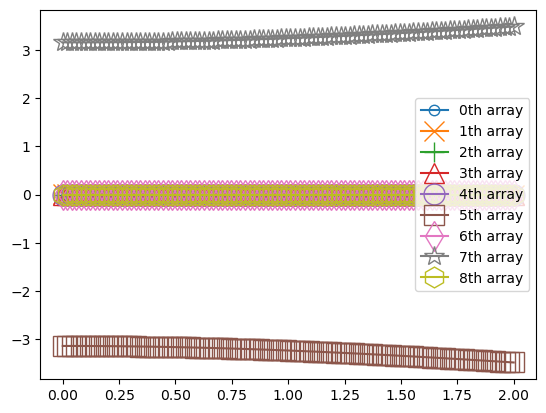

In [7]:
mark = ['.','x','+','^','o','s','d','*','h']

for i in range(9):
    plt.plot(gam_arr,globals()["ele{}".format(i)],label = str(i) + "th array",marker = mark[i],mfc="None",markersize = 15)

plt.legend()
plt.show()

Data output

In [10]:
df = np.column_stack((gam_arr, ele0, ele1, ele2, ele3, ele4, ele5 ,ele6, ele7, ele8))
np.savetxt('./Matrix_data/M_N_gam_{}to{}.txt'.format(int(gam_arr[0]),int(gam_arr[len(gam_arr)-1])),df)